In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [4]:
APPLE = pd.read_csv("AAPL.csv")
BTC = pd.read_csv("BTC-USD.csv")
IDEA = pd.read_csv("IDEA.NS.csv")
MATIC = pd.read_csv("MATIC-USD.csv")
MINDA = pd.read_csv("MINDACORP.NS.csv")
MRNA = pd.read_csv("MRNA.csv")
AMAZON = pd.read_csv("AMZN.csv")
PIDILITE = pd.read_csv("PIDILITIND.NS.csv")
QQQ = pd.read_csv("QQQ.csv")
TESLA = pd.read_csv("TSLA.csv")
SP500 = pd.read_csv("SPY.csv")

APPLE = APPLE[["Date", "Adj Close"]]
BTC = BTC[["Date", "Adj Close"]]
IDEA = IDEA[["Date", "Adj Close"]]
MATIC = MATIC[["Date", "Adj Close"]]
MINDA = MINDA[["Date", "Adj Close"]]
MRNA = MRNA[["Date", "Adj Close"]]
AMAZON = AMAZON[["Date", "Adj Close"]]
PIDILITE = PIDILITE[["Date", "Adj Close"]]
QQQ = QQQ[["Date", "Adj Close"]]
TESLA = TESLA[["Date", "Adj Close"]]
SP500 = SP500[["Date", "Adj Close"]]

APPLE.rename(columns = {"Adj Close": "APPLE"}, inplace = True)
BTC.rename(columns={"Adj Close": "BTC"}, inplace = True)
IDEA.rename(columns={"Adj Close": "IDEA"}, inplace = True)
MATIC.rename(columns={"Adj Close": "MATIC"}, inplace = True)
MINDA.rename(columns={"Adj Close": "MINDA"}, inplace = True)
MRNA.rename(columns={"Adj Close": "MRNA"}, inplace = True)
AMAZON.rename(columns={"Adj Close": "AMAZON"}, inplace = True)
PIDILITE.rename(columns={"Adj Close": "PIDILITE"}, inplace = True)
QQQ.rename(columns={"Adj Close": "QQQ"}, inplace = True)
TESLA.rename(columns={"Adj Close": "TESLA"}, inplace = True)
SP500.rename(columns={"Adj Close": "SP500"}, inplace = True)

In [5]:
dataframes = [APPLE, BTC, IDEA, MATIC, MINDA, MRNA, AMAZON, PIDILITE, QQQ, TESLA, SP500]

stocks_df = dataframes[0]

for df in dataframes[1:]:
    stocks_df = pd.merge(stocks_df, df, on="Date")

In [6]:
stocks_df

,Date,APPLE,BTC,IDEA,MATIC,MINDA,MRNA,AMAZON,PIDILITE,QQQ,TESLA,SP500
0,2023-02-21,147.691666,24436.353516,7.00,1.384936,195.589005,160.089996,94.580002,2322.052246,292.012421,197.369995,393.115204
1,2023-02-22,148.119385,24188.843750,7.00,1.397024,194.692490,158.169998,95.790001,2285.008545,292.230865,200.860001,392.573425
2,2023-02-23,148.606796,23947.492188,6.70,1.354701,197.431824,147.570007,95.820000,2258.619873,294.783264,202.070007,394.661682
3,2023-02-24,145.931061,23198.126953,6.75,1.265957,196.037247,139.259995,93.500000,2266.138184,289.847351,196.880005,390.445740
4,2023-02-27,147.134644,23522.871094,6.70,1.235484,191.953140,138.270004,93.760002,2270.071533,291.923065,207.630005,391.775543
...,...,...,...,...,...,...,...,...,...,...,...,...
232,2024-02-13,185.039993,49742.441406,14.70,0.853679,404.700012,85.370003,168.639999,2671.300049,428.549988,184.020004,494.079987
233,2024-02-14,184.149994,51826.695313,15.55,0.890873,409.750000,85.949997,170.979996,2663.199951,433.220001,188.710007,498.570007
234,2024-02-15,183.860001,51938.554688,15.95,0.889928,404.000000,91.139999,169.800003,2653.550049,434.510010,200.449997,502.010010
235,2024-02-16,182.309998,52160.203125,15.90,0.952738,406.250000,88.370003,169.509995,2711.100098,430.570007,199.949997,499.510010


In [7]:
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head(5)

,Date,APPLE,BTC,IDEA,MATIC,MINDA,MRNA,AMAZON,PIDILITE,QQQ,TESLA,SP500
0,2023-02-21,147.691666,24436.353516,7.00,1.384936,195.589005,160.089996,94.580002,2322.052246,292.012421,197.369995,393.115204
1,2023-02-22,148.119385,24188.843750,7.00,1.397024,194.692490,158.169998,95.790001,2285.008545,292.230865,200.860001,392.573425
2,2023-02-23,148.606796,23947.492188,6.70,1.354701,197.431824,147.570007,95.820000,2258.619873,294.783264,202.070007,394.661682
3,2023-02-24,145.931061,23198.126953,6.75,1.265957,196.037247,139.259995,93.500000,2266.138184,289.847351,196.880005,390.445740
4,2023-02-27,147.134644,23522.871094,6.70,1.235484,191.953140,138.270004,93.760002,2270.071533,291.923065,207.630005,391.775543


In [8]:
def normalize_stocks(df):
    df_ = df.copy()
    for stock in df_.columns[1:]:
        df_[stock] = df_[stock] / df_.loc[0, stock]
    return df_

norm_stocks_df = normalize_stocks(stocks_df)
norm_stocks_df.head(5)

,Date,APPLE,BTC,IDEA,MATIC,MINDA,MRNA,AMAZON,PIDILITE,QQQ,TESLA,SP500
0,2023-02-21,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2023-02-22,1.002896,0.989871,1.000000,1.008728,0.995416,0.988007,1.012793,0.984047,1.000748,1.017683,0.998622
2,2023-02-23,1.006196,0.979995,0.957143,0.978169,1.009422,0.921794,1.013111,0.972683,1.009489,1.023813,1.003934
3,2023-02-24,0.988079,0.949329,0.964286,0.914091,1.002292,0.869886,0.988581,0.975920,0.992586,0.997517,0.993209
4,2023-02-27,0.996228,0.962618,0.957143,0.892087,0.981411,0.863702,0.991330,0.977614,0.999694,1.051984,0.996592


In [9]:
fig = px.line(title = "Normalized stock prices")

for stock in norm_stocks_df.columns[1:]:
    fig.add_scatter(x = norm_stocks_df["Date"], y = norm_stocks_df[stock], name = stock)
fig.show()

In [10]:
def daily_return_estimator(df):
    df_daily_return = df.copy()

    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

        df_daily_return.loc[0, i] = 0

    return df_daily_return

In [11]:
stocks_daily_return = daily_return_estimator(stocks_df)
stocks_daily_return.head(5)

,Date,APPLE,BTC,IDEA,MATIC,MINDA,MRNA,AMAZON,PIDILITE,QQQ,TESLA,SP500
0,2023-02-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-02-22,0.289603,-1.012875,0.000000,0.872820,-0.458367,-1.199324,1.279339,-1.595300,0.074806,1.768256,-0.137817
2,2023-02-23,0.329066,-0.997780,-4.285714,-3.029511,1.407005,-6.701645,0.031317,-1.154861,0.873419,0.602413,0.531940
3,2023-02-24,-1.800547,-3.129201,0.746269,-6.550818,-0.706359,-5.631234,-2.421206,0.332872,-1.674421,-2.568418,-1.068242
4,2023-02-27,0.824761,1.399872,-0.740741,-2.407112,-2.083332,-0.710894,0.278077,0.173571,0.716140,5.460179,0.340586


Text(0.5, 1.0, 'Daily returns of the stocks')

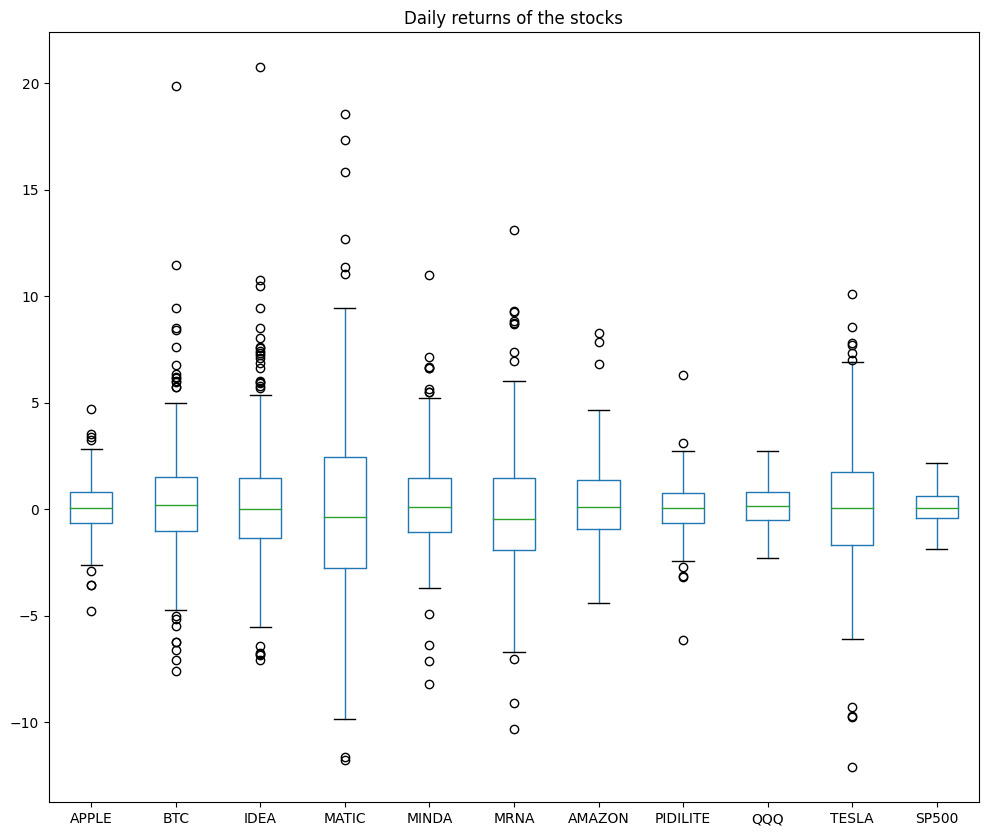

In [12]:
stocks_daily_return.boxplot(figsize=(12, 10), grid=False)
plt.title("Daily returns of the stocks")

Text(0.5, 1.0, 'Daily returns of the stocks')

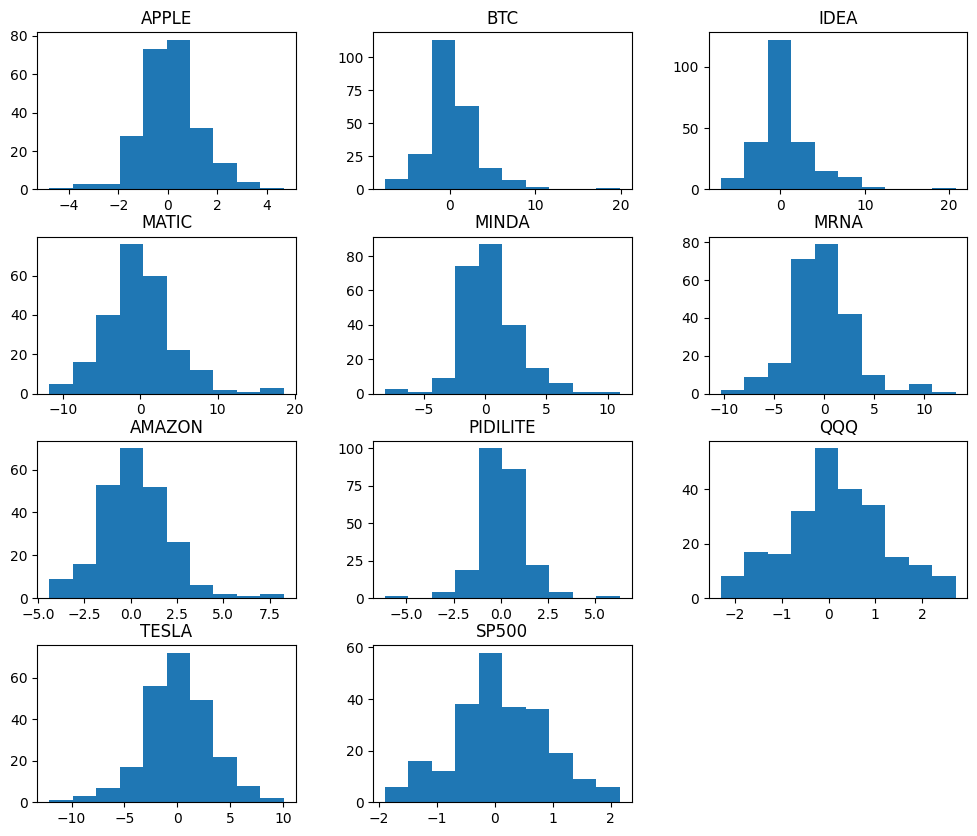

In [13]:
stocks_daily_return.hist(figsize=(12, 10), grid=False)
plt.title("Daily returns of the stocks")

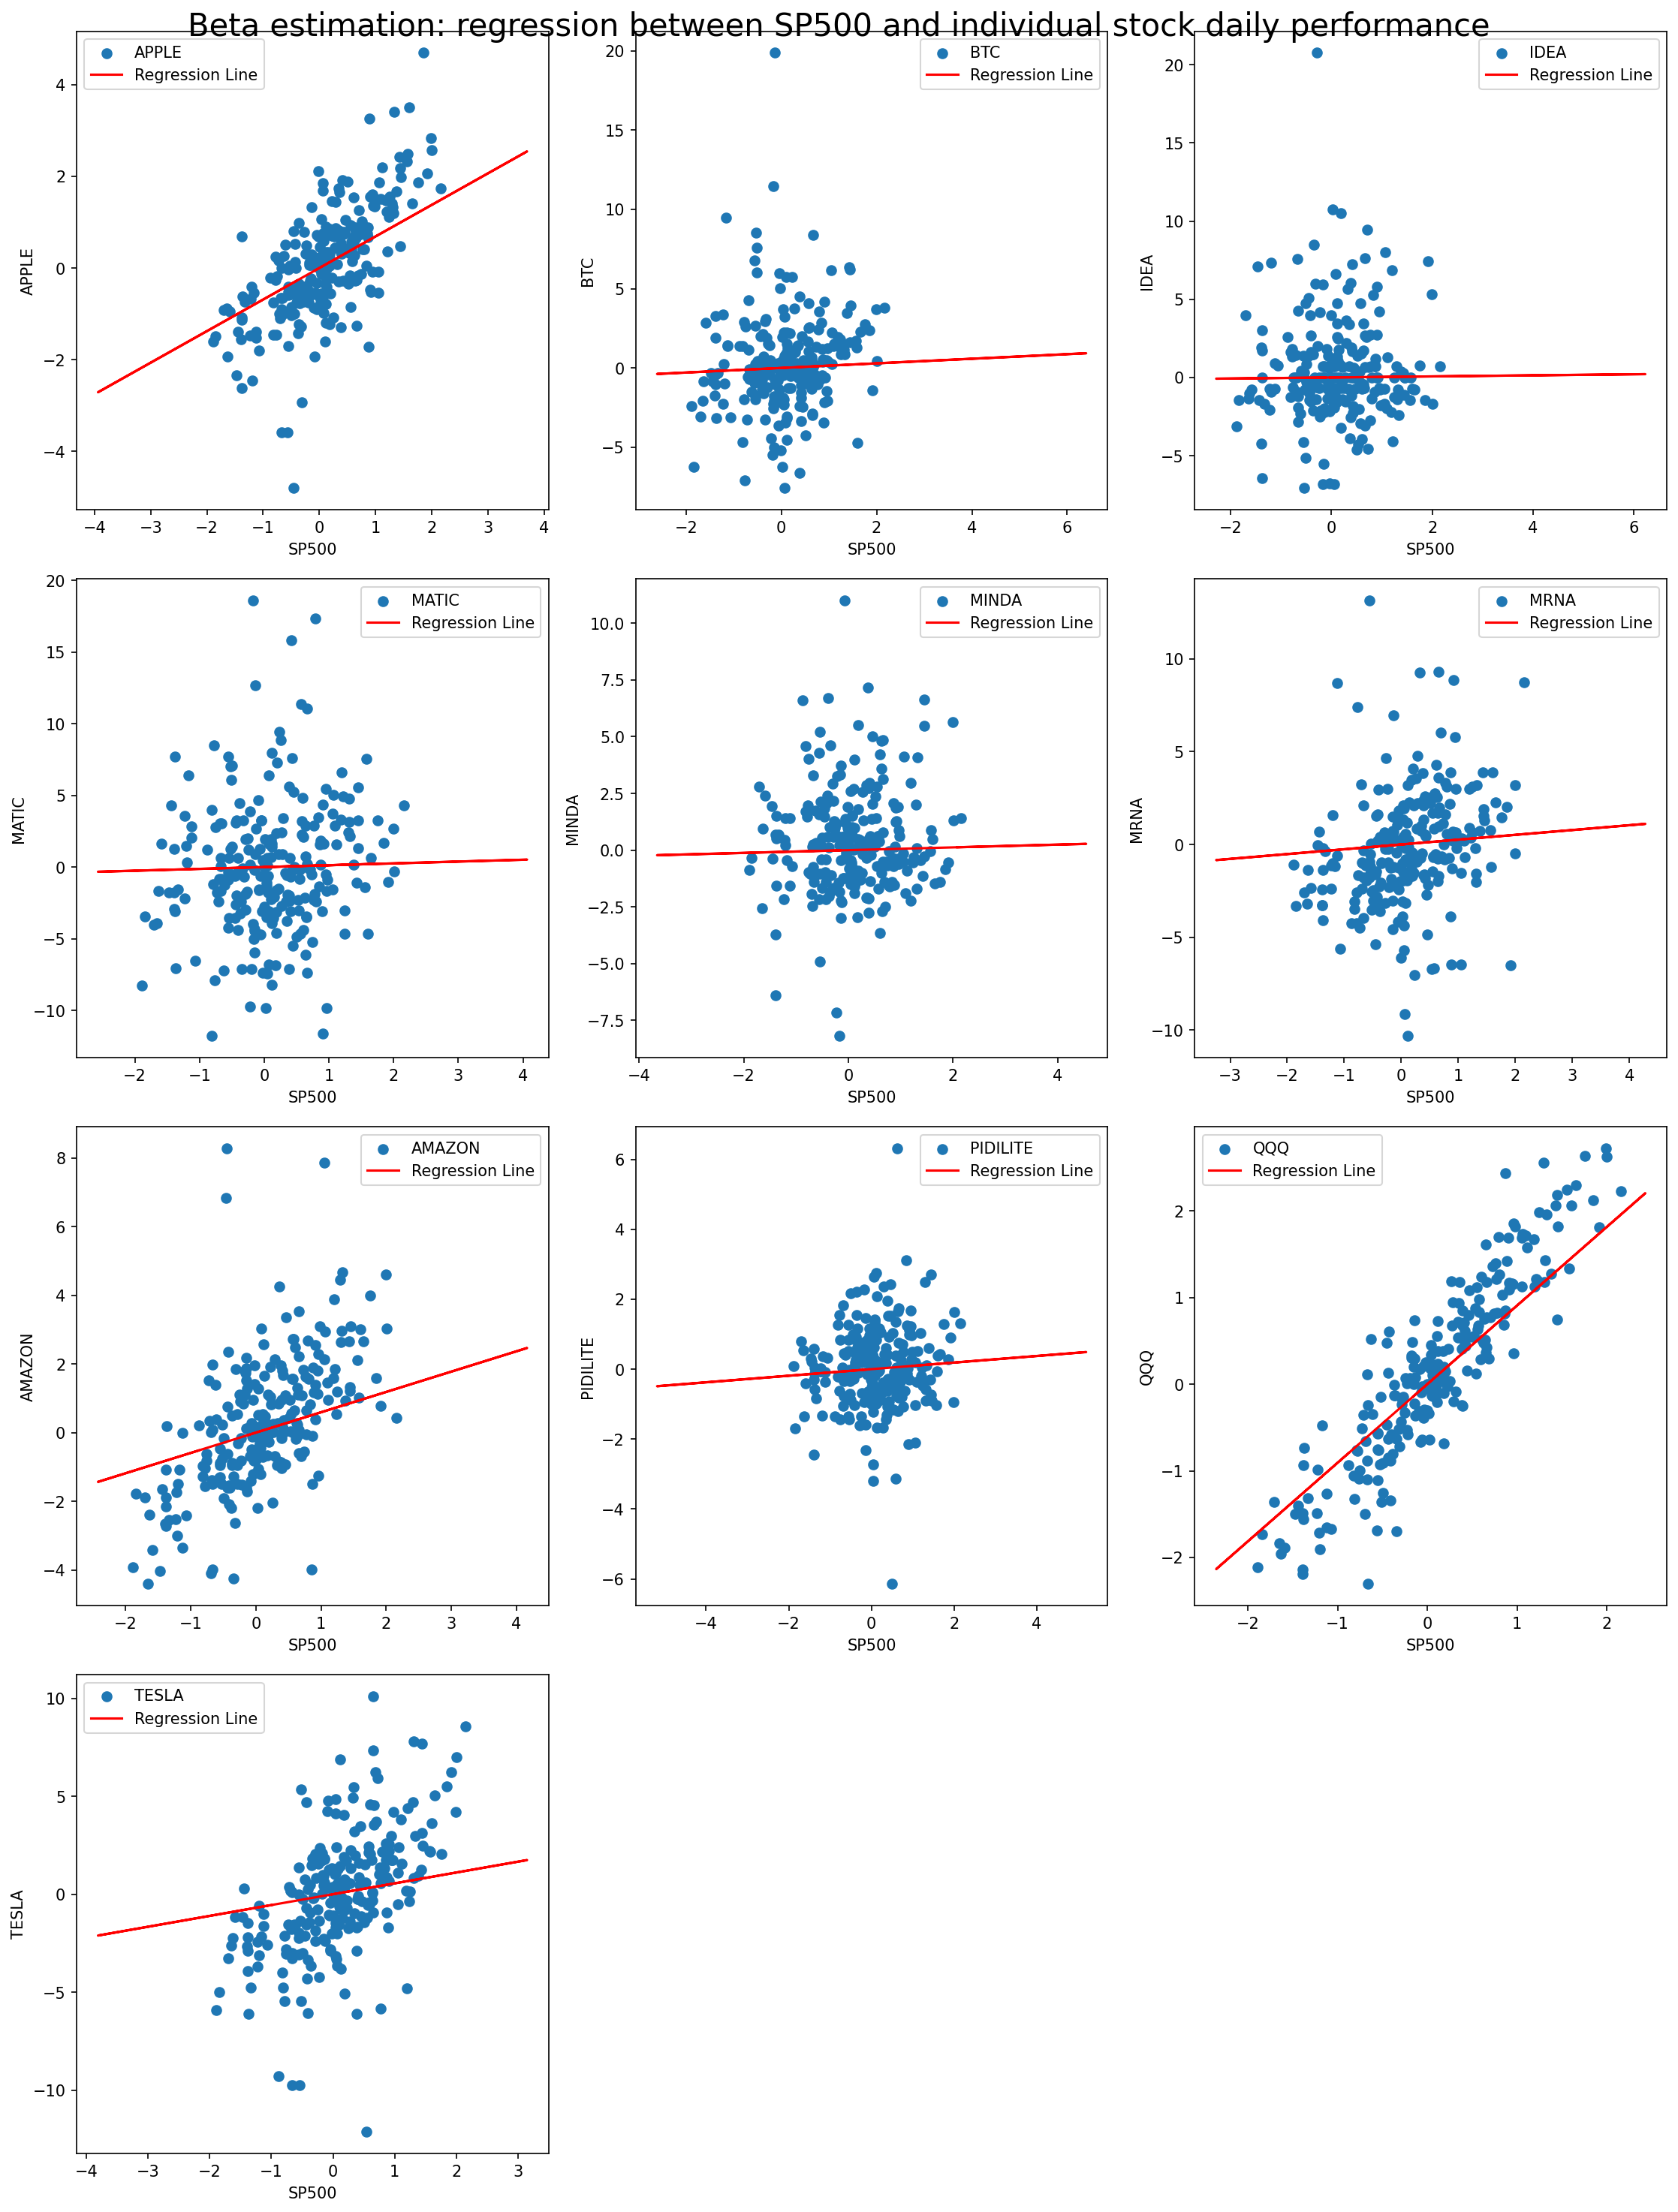

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

beta, alpha = dict(), dict()

num_assets = len(stocks_daily_return.columns) - 2
num_subplots_per_row = 3
num_rows = (num_assets + num_subplots_per_row - 1) // num_subplots_per_row
fig, axes = plt.subplots(num_rows, num_subplots_per_row, dpi=150, figsize=(15, 5*num_rows))

axes = axes.flatten()

for idx, stock in enumerate(stocks_daily_return.columns):
    if stock != "Date" and stock != "SP500":
        subplot_idx = idx - 1 if idx > 0 else 0

        axes[subplot_idx].scatter(stocks_daily_return["SP500"], stocks_daily_return[stock], label=stock)

        scaler = StandardScaler()
        X = scaler.fit_transform(stocks_daily_return[stock].values.reshape(-1, 1))
        y = scaler.fit_transform(stocks_daily_return["SP500"].values.reshape(-1, 1))

        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X)
        y_imputed = imputer.fit_transform(y)

        ridge = Ridge(alpha=1.0)
        ridge.fit(X_imputed, y_imputed)
        b_ = ridge.coef_[0]
        a_ = ridge.intercept_

        regression_line = b_ * X_imputed + a_
        axes[subplot_idx].plot(X_imputed, regression_line, "-", color="r", label="Regression Line")

        beta[stock] = b_
        alpha[stock] = a_

        axes[subplot_idx].set_xlabel("SP500")
        axes[subplot_idx].set_ylabel(stock)
        axes[subplot_idx].legend()

for ax in axes[num_assets:]:
    ax.remove()

plt.suptitle("Beta estimation: regression between SP500 and individual stock daily performance", size=20)
plt.tight_layout()
plt.show()

In [15]:
Expected_Returns = dict()
rf = 0.06    # taking 6% yield of risk free bond
rm = stocks_daily_return["SP500"].mean() * 253/100

In [16]:
rm

0.25799128012133665

In [17]:
keys = list(beta.keys())
for k in keys:
    Expected_Returns[k] = rf + beta[k] * (rm-rf)

for k in keys:
    er_value = Expected_Returns[k][0]
    print("Expected return based on CAPM model for {} is {:.4f}%".format(k, er_value))

Expected return based on CAPM model for APPLE is 0.1962%
Expected return based on CAPM model for BTC is 0.0887%
Expected return based on CAPM model for IDEA is 0.0667%
Expected return based on CAPM model for MATIC is 0.0853%
Expected return based on CAPM model for MINDA is 0.0721%
Expected return based on CAPM model for MRNA is 0.1113%
Expected return based on CAPM model for AMAZON is 0.1772%
Expected return based on CAPM model for PIDILITE is 0.0786%
Expected return based on CAPM model for QQQ is 0.2396%
Expected return based on CAPM model for TESLA is 0.1696%


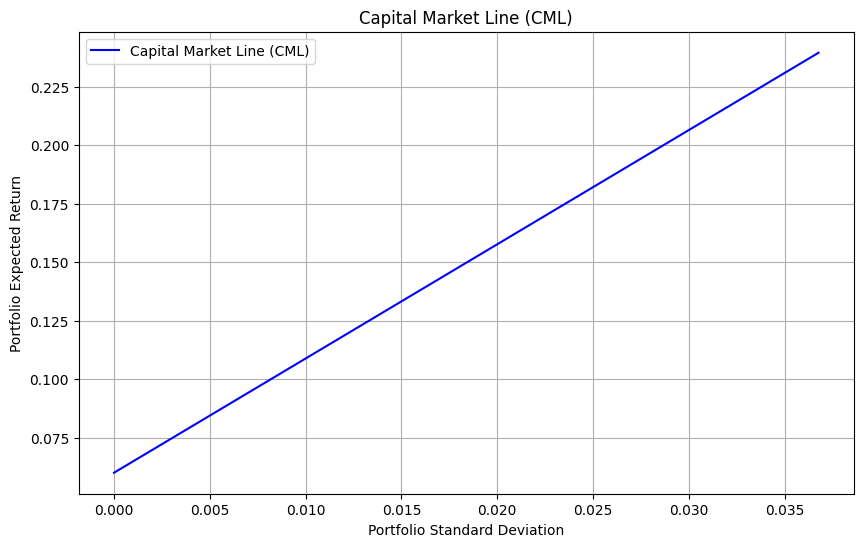

In [35]:
def plot_cml(Expected_Returns, rf, rm):
    assets = list(Expected_Returns.keys())
    er_values = np.array([Expected_Returns[k][0] for k in assets])

    market_portfolio_std = np.std(er_values)

    market_portfolio_sharpe_ratio = (rm - rf) / market_portfolio_std

    cml_slope = ((rm - rf) / market_portfolio_std)+1.5

    portfolio_returns = np.linspace(rf, max(er_values), 100)

    portfolio_std = (portfolio_returns - rf) / cml_slope

    plt.figure(figsize=(10, 6))
    plt.plot(portfolio_std, portfolio_returns, 'b-', label='Capital Market Line (CML)')
    plt.xlabel('Portfolio Standard Deviation')
    plt.ylabel('Portfolio Expected Return')
    plt.title('Capital Market Line (CML)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_cml(Expected_Returns, rf, rm)

In [20]:
new_stocks_df = norm_stocks_df.drop(['Date','SP500'], axis=1)
new_stocks_df

,APPLE,BTC,IDEA,MATIC,MINDA,MRNA,AMAZON,PIDILITE,QQQ,TESLA
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002896,0.989871,1.000000,1.008728,0.995416,0.988007,1.012793,0.984047,1.000748,1.017683
2,1.006196,0.979995,0.957143,0.978169,1.009422,0.921794,1.013111,0.972683,1.009489,1.023813
3,0.988079,0.949329,0.964286,0.914091,1.002292,0.869886,0.988581,0.975920,0.992586,0.997517
4,0.996228,0.962618,0.957143,0.892087,0.981411,0.863702,0.991330,0.977614,0.999694,1.051984
...,...,...,...,...,...,...,...,...,...,...
232,1.252880,2.035592,2.100000,0.616403,2.069135,0.533263,1.783041,1.150405,1.467575,0.932361
233,1.246854,2.120885,2.221429,0.643259,2.094954,0.536885,1.807782,1.146916,1.483567,0.956123
234,1.244891,2.125463,2.278571,0.642577,2.065556,0.569305,1.795306,1.142761,1.487985,1.015605
235,1.234396,2.134533,2.271429,0.687929,2.077059,0.552002,1.792239,1.167545,1.474492,1.013072


In [21]:
Covariance_Matrix = np.cov(new_stocks_df.values, rowvar=False)
Covariance_Matrix

array([[ 0.00756426,  0.01517436,  0.02260128, -0.00688978,  0.02008287,
        -0.00780973,  0.01519108,  0.00374023,  0.00969611,  0.00915631],
       [ 0.01517436,  0.08883631,  0.11636423,  0.00183418,  0.07113556,
        -0.0260286 ,  0.05001657,  0.00874343,  0.03016147,  0.00104448],
       [ 0.02260128,  0.11636423,  0.22300144, -0.01926557,  0.12686234,
        -0.05497312,  0.0843604 ,  0.01129839,  0.04915233,  0.01735979],
       [-0.00688978,  0.00183418, -0.01926557,  0.02207066, -0.02212528,
         0.01211552, -0.01543194, -0.00280423, -0.00890253, -0.01646541],
       [ 0.02008287,  0.07113556,  0.12686234, -0.02212528,  0.09125885,
        -0.03565949,  0.06053948,  0.01011396,  0.03600203,  0.0166931 ],
       [-0.00780973, -0.0260286 , -0.05497312,  0.01211552, -0.03565949,
         0.02142389, -0.02435035, -0.00260418, -0.01339303, -0.00905769],
       [ 0.01519108,  0.05001657,  0.0843604 , -0.01543194,  0.06053948,
        -0.02435035,  0.04569476,  0.00816808

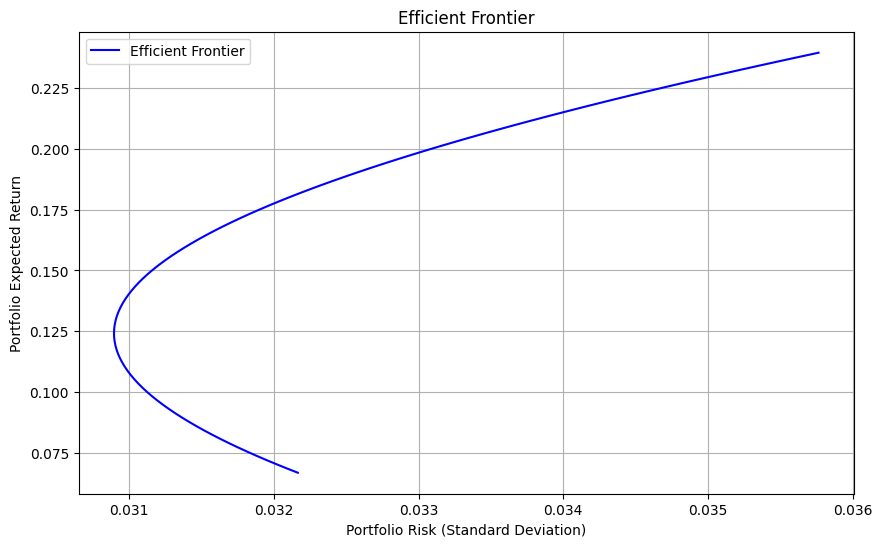

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

def plot_efficient_frontier(Expected_Returns, Covariance_Matrix):
    assets = list(Expected_Returns.keys())
    er_values = np.array([Expected_Returns[k][0] for k in assets])

    min_return = min(er_values)
    max_return = max(er_values)
    target_returns = np.linspace(min_return, max_return, 100)

    portfolio_risk = np.zeros_like(target_returns)
    portfolio_return = np.zeros_like(target_returns)

    for i, target_return in enumerate(target_returns):
        weights = cp.Variable(len(assets))
        risk = cp.quad_form(weights, Covariance_Matrix)
        objective = cp.Minimize(risk)

        constraints = [
            cp.sum(weights) == 1,
            weights.T @ er_values == target_return
        ]

        problem = cp.Problem(objective, constraints)
        problem.solve()

        portfolio_risk[i] = np.sqrt(risk.value)
        portfolio_return[i] = target_return

    plt.figure(figsize=(10, 6))
    plt.plot(portfolio_risk, portfolio_return, 'b-', label='Efficient Frontier')
    plt.xlabel('Portfolio Risk (Standard Deviation)')
    plt.ylabel('Portfolio Expected Return')
    plt.title('Efficient Frontier')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_efficient_frontier(Expected_Returns, Covariance_Matrix)

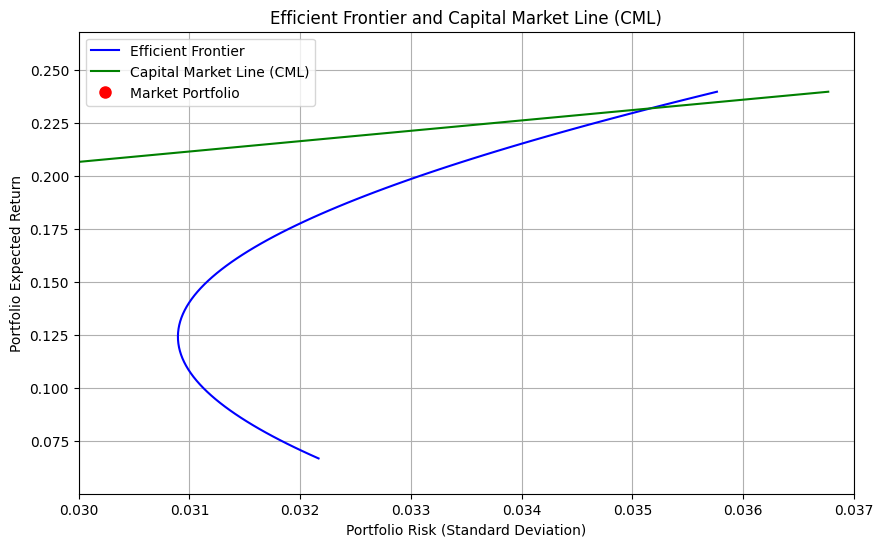

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

def calculate_efficient_frontier(Expected_Returns, Covariance_Matrix):
    assets = list(Expected_Returns.keys())
    er_values = np.array([Expected_Returns[k][0] for k in assets])

    min_return = min(er_values)
    max_return = max(er_values)
    target_returns = np.linspace(min_return, max_return, 100)

    portfolio_risk = np.zeros_like(target_returns)
    portfolio_return = np.zeros_like(target_returns)

    for i, target_return in enumerate(target_returns):
        weights = cp.Variable(len(assets))
        risk = cp.quad_form(weights, Covariance_Matrix)
        objective = cp.Minimize(risk)

        constraints = [
            cp.sum(weights) == 1,
            weights.T @ er_values == target_return
        ]

        problem = cp.Problem(objective, constraints)
        problem.solve()

        portfolio_risk[i] = np.sqrt(risk.value)
        portfolio_return[i] = target_return

    return portfolio_risk, portfolio_return

def plot_both(Expected_Returns, Covariance_Matrix, rf, rm):
    portfolio_risk, portfolio_return = calculate_efficient_frontier(Expected_Returns, Covariance_Matrix)

    plt.figure(figsize=(10, 6))
    plt.plot(portfolio_risk, portfolio_return, 'b-', label='Efficient Frontier')

    assets = list(Expected_Returns.keys())
    er_values = np.array([Expected_Returns[k][0] for k in assets])
    market_portfolio_std = np.std(er_values)
    market_portfolio_sharpe_ratio = (rm - rf) / market_portfolio_std
    cml_slope = ((rm - rf) / market_portfolio_std)+1.5
    #print(cml_slope)
    portfolio_returns = np.linspace(rf, max(er_values), 100)
    portfolio_std = (portfolio_returns - rf) / cml_slope

    plt.plot(portfolio_std, portfolio_returns, 'g-', label='Capital Market Line (CML)')

    plt.plot(market_portfolio_std, rm, 'ro', markersize=8, label='Market Portfolio')

    plt.xlabel('Portfolio Risk (Standard Deviation)')
    plt.ylabel('Portfolio Expected Return')
    plt.title('Efficient Frontier and Capital Market Line (CML)')
    plt.xlim(0.030, 0.037)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_both(Expected_Returns, Covariance_Matrix, rf, rm)

In [ ]:
print(beta)

{'APPLE': array([0.68791363]), 'BTC': array([0.14487553]), 'IDEA': array([0.03405282]), 'MATIC': array([0.12780177]), 'MINDA': array([0.06092058]), 'MRNA': array([0.2589057]), 'AMAZON': array([0.59206289]), 'PIDILITE': array([0.09415966]), 'QQQ': array([0.90712803]), 'TESLA': array([0.55331553])}


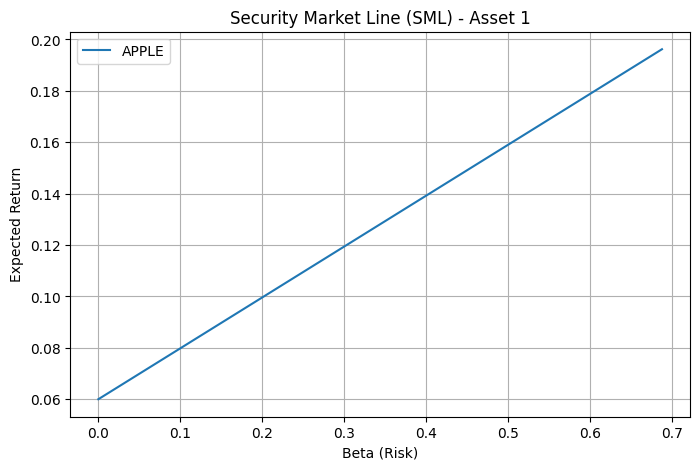

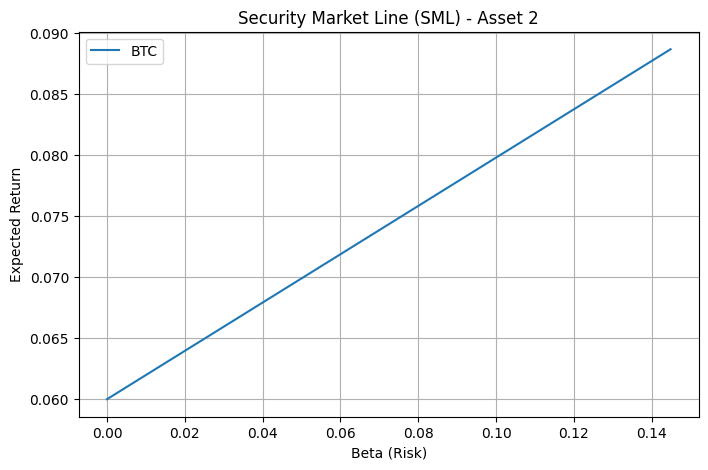

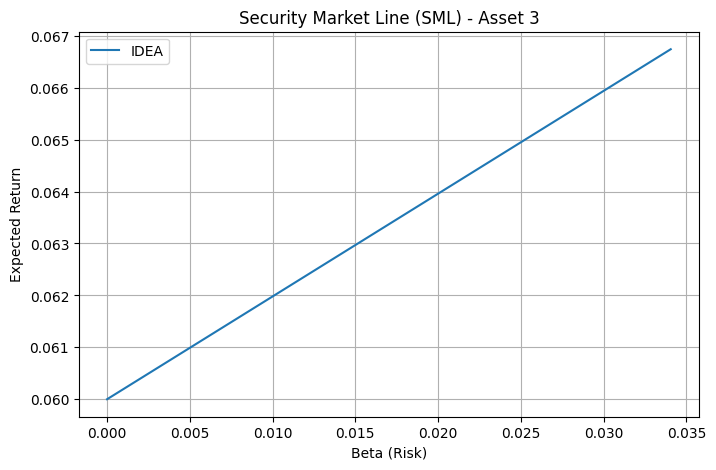

In [ ]:
er_asset1 = rf + beta['APPLE'] * (rm - rf)
er_asset2 = rf + beta['BTC'] * (rm - rf)
er_asset3 = rf + beta['IDEA'] * (rm - rf)

# Plot SML for Asset 1
plt.figure(figsize=(8, 5))
plt.plot([0, beta['APPLE'][0]], [rf, er_asset1[0]], label='APPLE')
plt.xlabel('Beta (Risk)')
plt.ylabel('Expected Return')
plt.title('Security Market Line (SML) - Asset 1')
plt.legend()
plt.grid(True)
plt.show()

# Plot SML for Asset 2
plt.figure(figsize=(8, 5))
plt.plot([0, beta['BTC'][0]], [rf, er_asset2[0]], label='BTC')
plt.xlabel('Beta (Risk)')
plt.ylabel('Expected Return')
plt.title('Security Market Line (SML) - Asset 2')
plt.legend()
plt.grid(True)
plt.show()

# Plot SML for Asset 3
plt.figure(figsize=(8, 5))
plt.plot([0, beta['IDEA'][0]], [rf, er_asset3[0]], label='IDEA')
plt.xlabel('Beta (Risk)')
plt.ylabel('Expected Return')
plt.title('Security Market Line (SML) - Asset 3')
plt.legend()
plt.grid(True)
plt.show()